In [2]:
# The code and Comments in this notebook are authored by Atul K S


##### Before working on santander data, I feel it is important to know what the company is, what are the data science initiatives by the company and to answer some basic questions like this.

* Having this knowledge will help us understand the data in a better way and probably help us make better decicisions in critical aspects.

#### A quick search on ChatGPT shows us what the bank is doing

* History: Banco Santander was founded in 1857 in the Spanish city of Santander. Over the years, it expanded both organically and through acquisitions to become a global banking group.

* Global Presence: Santander operates in Europe, the Americas, and other regions. It has a significant presence in Spain, the United Kingdom, Portugal, Poland, Brazil, and Mexico. Additionally, it has operations in the United States, where it acquired Sovereign Bank in 2009.

* Services: Santander Bank offers a wide range of financial products and services. These include personal banking, commercial banking, corporate banking, private banking, investment banking, asset management, and insurance. It caters to individual customers, small and medium-sized enterprises (SMEs), large corporations, and institutional clients.

* Retail Banking: Santander is known for its retail banking services. It provides various banking products, such as checking and savings accounts, mortgages, personal loans, credit cards, and wealth management services. Retail banking forms a significant part of Santander's operations.

* Digital Transformation: Like many other banks, Santander has been embracing digital transformation to enhance customer experience and streamline its operations. It has invested in digital platforms, mobile banking apps, and online services to offer convenience and accessibility to its customers.

* Corporate Social Responsibility: Santander is committed to corporate social responsibility and has various initiatives in place to support education, entrepreneurship, and community development. It operates the Santander Universities program, which funds academic projects and scholarships worldwide.

* Branding and Sponsorships: Santander Bank has been involved in sports sponsorships, including partnerships with Formula One racing teams and major football clubs like Real Madrid, FC Barcelona, and Copa Libertadores.

#### A few data science initiatives by the bank

* Risk Assessment and Fraud Detection: Santander Bank utilizes data science techniques to assess and manage risk in its operations. This includes analyzing large volumes of data to identify potential fraud patterns and enhance fraud detection mechanisms. By leveraging machine learning algorithms and predictive modeling, the bank can identify suspicious transactions and prevent fraudulent activities.

* Customer Analytics and Personalization: Santander employs data science to gain insights into customer behavior, preferences, and needs. By analyzing customer data, including transaction history, online interactions, and demographic information, the bank can personalize its offerings and deliver targeted marketing campaigns. This helps Santander improve customer satisfaction, increase cross-selling opportunities, and enhance customer loyalty.

* Credit Risk Modeling: Data science plays a vital role in credit risk assessment at Santander. The bank employs advanced analytics techniques to build predictive models that assess the creditworthiness of customers and evaluate the risk associated with lending decisions. By analyzing historical data and incorporating various factors, such as income, credit history, and financial indicators, Santander can make informed decisions about credit approvals and pricing.

* Customer Churn Prediction: Santander utilizes data science to predict customer churn, i.e., the likelihood of customers leaving the bank. By analyzing customer behavior, transaction patterns, and engagement levels, the bank can identify signs of potential churn and take proactive measures to retain valuable customers. This may involve targeted retention campaigns or personalized offers to improve customer satisfaction and loyalty.

* Process Optimization and Automation: Data science techniques are used by Santander to optimize and automate various internal processes. By analyzing operational data, the bank can identify bottlenecks, inefficiencies, and opportunities for improvement. This may include automating manual tasks, streamlining workflows, and enhancing decision-making processes, ultimately leading to cost savings and operational efficiencies.

### This link shows us the financials of the bank
https://www.santander.com/en/press-room/specials/results-santander

### Checking out multiple links like this would give us a base on what the company does, what it stands for, where is the companies major business etc

### Having a knowledge on these would be really good to atleast have a initial start :)

In [5]:
# Having a basic sense on what it is, let us now go look at what the data by importing the data and a few important libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.metrics import confusion_matrix
import math
from itertools import product
import scipy.stats as ss
from sklearn.svm import SVC
from sklearn import svm
from matplotlib.colors import ListedColormap



pd.set_option("display.max_columns", None)
sns.set(font_scale=1)
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import chisquare
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import sklearn.metrics as metrics
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression


# Import packages
import os
import pandas as pd
import tensorflow as tf
import tempfile, urllib, zipfile
import tensorflow_data_validation as tfdv


from tensorflow.python.lib.io import file_io
from tensorflow_data_validation.utils import slicing_util
from tensorflow_metadata.proto.v0.statistics_pb2 import DatasetFeatureStatisticsList, DatasetFeatureStatistics

# Set TF's logger to only display errors to avoid internal warnings being shown
tf.get_logger().setLevel('ERROR')

### Reading the train and test data of Santander Dataset

In [8]:
df=pd.read_csv('train.csv')
tdf=pd.read_csv('test.csv')

In [9]:
# having read the train and the test data, let us now see the data, understand the data and do some pre-processing on it

#### Usually in a production environemnt, we perform data pre-processing only the training dataset.because we want the model to be ready to face real time data that flows withoout any data-preprocessing
#### Here, we are assuming that we have a fixed dataset that we will feed into the model
#### Hence, we will perform data pre-processing on both the test and train datasets.

In [11]:
df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21   var_22  \
0  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791   
1  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524   
2  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145   
3  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202   
4  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085   
1  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   
2  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025   
3  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398   
4  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   

    var_31  var_32   var_33   var_34   var_35  var_36  var_37   var_38  \
0  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667   
1   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160   
2  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917   
3  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738   
4   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038   

   var_39   var_40   var_41   var_42   var_43   var_44   var_45   var_46  \
0  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418  -7.0170   5.9226   
1  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444 -47.3797   7.3718   
2  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006  -7.9078  11.1405   
3  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485 -24.6840  12.7404   
4  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087 -65.4863  13.8657   

    var_47   var_48   var_49   var_50   var_51  var_52  var_53  var_54  \
0 -14.2136  16.0283   5.3253  12.9194  29.0460 -0.6940  5.1736 -0.7474   
1   0.1948  34.4014  25.7037  11.8343  13.2256 -4.1083  6.6885 -8.0946   
2  -5.7864  20.7477   6.8874  12.9143  19.5856  0.7268  6.4059  9.3124   
3 -35.1659   0.7613   8.3838  12.6832   9.5503  1.7895  5.2091  8.0913   
4   0.0444  -0.1346  14.4268  13.3273  10.4857 -1.4367  5.7555 -8.5414   

    var_55   var_56  var_57  var_58   var_59   var_60   var_61  var_62  \
0  14.8322  11.2668  5.3822  2.0183  10.1166  16.1828   4.9590  2.0771   
1  18.5995  19.3219  7.0118  1.9210   8.8682   8.0109  -7.2417  1.7944   
2   6.2846  15.6372  5.8200  1.1000   9.1854  12.5963 -10.3734  0.8748   
3  12.3972  14.4698  6.5850  3.3164   9.4638  15.7820 -25.0222  3.4418   
4  14.1482  16.9840  6.1812  1.9548   9.2048   8.6591 -27.7439 -0.4952   

   var_63  var_64  var_65  var_66   var_67  var_68  var_69   var_70  var_71  \
0 -0.2154  8.6748  9.5319  5.8056  22.4321  5.0109 -4.7010  21.6374  0.5663   
1 -1.3147  8.1042  1.5365  5.4007   7.9344  5.0220  2.2302  40.5632  0.5134   
2  5.8042  3.7163 -1.1016  7.3667   9.8565  5.0228 -5.7828   2.3612  0.8520   
3 -4.3923  8.6464  6.3072  5.6221  23.6143  5.0220 -3.9989   4.0462

In [12]:
tdf.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8   var_9  var_10  var_11   var_12   var_13   var_14  \
0  18.2675  2.1337  8.8100 -2.0248 -4.3554  13.9696   0.3458   7.5408   
1  18.6316 -4.4131  5.9739 -1.3809 -0.3310  14.1129   2.5667   5.4988   
2  20.2537  1.5233  8.3442 -4.7057 -3.0422  13.6751   3.8183  10.8535   
3  20.5660  3.3755  7.4578  0.0095 -5.0659  14.0526  13.5010   8.7660   
4  10.6048  2.9890  7.1437  5.1025 -3.2827  14.1013   8.9672   4.7276   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21  var_22  \
0  14.5001   7.7028 -19.0919  15.5806  16.1763   3.7088  18.8064  1.5899   
1  14.1853   7.0196   4.6564  29.1609   0.0910  12.1469   3.1389  5.2578   
2  14.2126   9.8837   2.6541  21.2181  20.8163  12.4666  12.3696  4.7473   
3  14.7352  10.0383 -15.3508   2.1273  21.4797  14.5372  12.5527  2.9707   
4  14.5811  11.8615   3.1480  18.0126  13.8006   1.6026  16.3059  6.7954   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  3.0654   6.4509  14.1192  -9.4902 -2.1917  5.7107  3.7864  -1.7981   
1  2.4228  16.2064  13.5023  -5.2341 -3.6648  5.7080  2.9965 -10.4720   
2  2.7936   5.2189  13.5670 -15.4246 -0.1655  7.2633  3.4310  -9.1508   
3  4.2398  13.7796  14.1408   1.0061 -1.3479  5.2570  6.5911   6.2161   
4  3.6015  13.6569  13.8807   8.6228 -2.2654  5.2255  7.0165 -15.6961   

    var_31  var_32   var_33   var_34  var_35  var_36  var_37   var_38  var_39  \
0   9.2645  2.0657  12.7753  11.3334  8.1462 -0.0610  3.5331   9.7804  8.7625   
1  11.4938 -0.9660  15.3445  10.6361  0.8966  6.7428  2.3421  12.8678 -1.5536   
2   9.7320  3.1062  22.3076  11.9593  9.9255  4.0702  4.9934   8.0667  0.8804   
3   9.5540  2.3628  10.2124  10.8047 -2.5588  6.0720  3.2613  16.5632  8.8336   
4  10.6239 -4.7674  17.5447  11.8668  3.0154  4.2546  6.7601   5.9613  0.3695   

    var_40   var_41   var_42   var_43   var_44   var_45   var_46   var_47  \
0 -15.6305  18.8766  11.2864  11.8362  13.3680 -31.9891  12.1776   8.7714   
1  10.0309   3.1337  10.5742  11.7664   2.1782 -41.1924  13.5322 -17.3834   
2 -19.0841   5.2272   9.5977  12.1801   8.3565  15.1170  10.0921 -20.8504   
3  -4.8327   0.9554  12.3754  11.4241   6.6917 -12.9761  13.7343   5.0150   
4 -14.4364   5.1392  11.6336  12.0338  18.9670  12.0144  16.2096  -2.1966   

    var_48   var_49   var_50   var_51  var_52  var_53  var_54   var_55  \
0  17.2011  16.8508  13.0534  14.4069 -4.8525  7.3213 -0.5259  16.6365   
1   6.3806  12.5589  11.6887  25.3930  1.5776  6.8481  8.7348  16.4239   
2   8.6758   8.1292  11.8932  10.6869 -0.6434  5.6510  9.3742  25.8831   
3  31.3923   5.8555  12.6082   1.4182 -4.1185  6.2536  1.4257  13.5426   
4   1.1174  13.4532  12.7925   4.3775 -0.1543  5.6794  0.8210  19.1358   

    var_56  var_57  var_58   var_59   var_60   var_61  var_62  var_63  var_64  \
0  19.3036  6.4129 -5.3948   9.3269  11.9314  -3.5750 -0.7706  0.8705  6.9282   
1  21.7056  6.9345  1.6678   9.5249   5.3383 -18.7083  1.3382 -1.7401  5.8398   
2  19.8701  5.4834 -4.0304   8.5160   8.9776  -5.6619  2.8117  2.5996  9.0986   
3  15.4090  6.8761  1.7476  10.0413  15.2857  -4.1378  0.7928  2.5301  8.1458   
4  12.6589  6.4394  4.3425   8.7003  12.0586 -10.4753 -0.0337  5.6603  6.2529   

   var_65  var_66   var_67  var_68  var_69   var_70  var_71  var_72   var_73  \
0  2.8914  5.9744  17.4851  5.0125 -1.4230  33.3401  0.8018 -4.7906  30.2708   
1  3.1051  4.4307  16.0005  5.0306 -7.3365  12.2806  0.6992 -0.7772  21.5123   
2  7.1167  4.9466  13.8268  5.0093  4.7782  19.2081  0.4340  0.8459  34.8598   
3  2.5738  5.9876  13.0758

Since this is a dataset that mimics the data used in the company, we understand the naming of features as var_XX
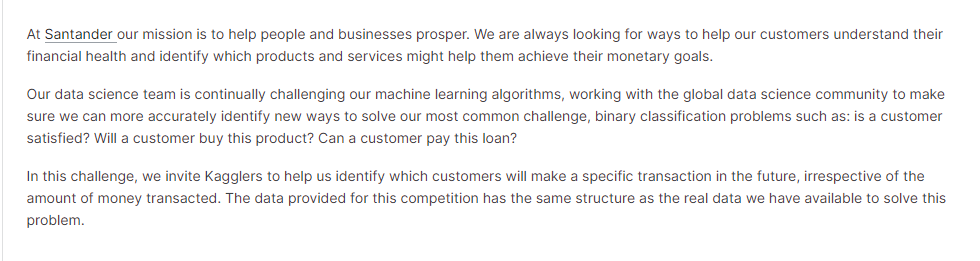


In [13]:
df.describe(include='all')

ID_code         target          var_0          var_1          var_2  \
count    200000  200000.000000  200000.000000  200000.000000  200000.000000   
unique   200000            NaN            NaN            NaN            NaN   
top     train_0            NaN            NaN            NaN            NaN   
freq          1            NaN            NaN            NaN            NaN   
mean        NaN       0.100490      10.679914      -1.627622      10.715192   
std         NaN       0.300653       3.040051       4.050044       2.640894   
min         NaN       0.000000       0.408400     -15.043400       2.117100   
25%         NaN       0.000000       8.453850      -4.740025       8.722475   
50%         NaN       0.000000      10.524750      -1.608050      10.580000   
75%         NaN       0.000000      12.758200       1.358625      12.516700   
max         NaN       1.000000      20.315000      10.376800      19.353000   

                var_3          var_4          var_5          var_6  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         6.796529      11.078333      -5.065317       5.408949   
std          2.043319       1.623150       7.863267       0.866607   
min         -0.040200       5.074800     -32.562600       2.347300   
25%          5.254075       9.883175     -11.200350       4.767700   
50%          6.825000      11.108250      -4.833150       5.385100   
75%          8.324100      12.261125       0.924800       6.003000   
max         13.188300      16.671400      17.251600       8.447700   

                var_7          var_8          var_9         var_10  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        16.545850       0.284162       7.567236       0.394340   
std          3.418076       3.332634       1.235070       5.500793   
min          5.349700     -10.505500       3.970500     -20.731300   
25%         13.943800      -2.317800       6.618800      -3.594950   
50%         16.456800       0.393700       7.629600       0.487300   
75%         19.102900       2.937900       8.584425       4.382925   
max         27.691800      10.151300      11.150600      18.670200   

               var_11         var_12         var_13         var_14  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        -3.245596      14.023978       8.530232       7.537606   
std          5.970253       0.190059       4.639536       2.247908   
min        -26.095000      13.434600      -6.011100       1.013300   
25%         -7.510600      13.894000       5.072800       5.781875   
50%         -3.286950      14.025500       8.604250       7.520300   
75%          0.852825      14.164200      12.274775       9.270425   
max         17.188700      14.654500      22.331500      14.937700   

               var_15         var_16         var_17         var_18  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        14.573126       9.333264      -5.696731      15.244013   
std          0.411711       2.557421       6.712612       7.851370   
min         13.076900       0.635100     -33.3

In [14]:
tdf.describe(include='all')

ID_code          var_0          var_1          var_2          var_3  \
count   200000  200000.000000  200000.000000  200000.000000  200000.000000   
unique  200000            NaN            NaN            NaN            NaN   
top     test_0            NaN            NaN            NaN            NaN   
freq         1            NaN            NaN            NaN            NaN   
mean       NaN      10.658737      -1.624244      10.707452       6.788214   
std        NaN       3.036716       4.040509       2.633888       2.052724   
min        NaN       0.188700     -15.043400       2.355200      -0.022400   
25%        NaN       8.442975      -4.700125       8.735600       5.230500   
50%        NaN      10.513800      -1.590500      10.560700       6.822350   
75%        NaN      12.739600       1.343400      12.495025       8.327600   
max        NaN      22.323400       9.385100      18.714100      13.142000   

                var_4          var_5          var_6          var_7  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        11.076399      -5.050558       5.415164      16.529143   
std          1.616456       7.869293       0.864686       3.424482   
min          5.484400     -27.767000       2.216400       5.713700   
25%          9.891075     -11.201400       4.772600      13.933900   
50%         11.099750      -4.834100       5.391600      16.422700   
75%         12.253400       0.942575       6.005800      19.094550   
max         16.037100      17.253700       8.302500      28.292800   

                var_8          var_9         var_10         var_11  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.277135       7.569407       0.371335      -3.268551   
std          3.333375       1.231865       5.508661       5.961443   
min         -9.956000       4.243300     -22.672400     -25.811800   
25%         -2.303900       6.623800      -3.626000      -7.522000   
50%          0.372000       7.632000       0.491850      -3.314950   
75%          2.930025       8.584825       4.362400       0.832525   
max          9.665500      11.003600      20.214500      16.771300   

               var_12         var_13         var_14         var_15  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        14.022662       8.540872       7.532703      14.573704   
std          0.190071       4.628712       2.255257       0.411592   
min         13.424500      -4.741300       0.670300      13.203400   
25%         13.891000       5.073375       5.769500      14.262400   
50%         14.024600       8.617400       7.496950      14.572700   
75%         14.162900      12.270900       9.271125      14.875600   
max         14.682000      21.605100      14.723100      15.798000   

               var_16        var_17         var_18         var_19  \
count   200000.000000  200000.00000  200000.000000  200000.000000   
unique            NaN           NaN            NaN            NaN   
top               NaN           NaN            NaN            NaN   
freq              NaN           NaN            NaN            NaN   
mean         9.321669      -5.70445      15.265776      12.456675   
std          2.544860       6.74646       7.846983       7.989812   
min          0.314300     -28.90690     -11.324200     -12.69940

In [15]:
df.shape

(200000, 202)

In [16]:
tdf.shape

(200000, 201)

### Statistics and visulalization of Training data

In [17]:
# To have a more detailed understanding of the data, let us use the tensorflow library tfdv
# tensorflow data validation ( TFDV)


In [18]:
# Let us have a look at the features that is present in the training set

In [19]:
# The following are the features in the dataset
features = [col for col in df.columns ]
features

['ID_code',
 'target',
 'var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89

In [20]:
stats_options = tfdv.StatsOptions(feature_allowlist=features)
# Review the features to generate the statistics
for feature in stats_options.feature_allowlist:
    print(feature)

ID_code
target
var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136

In [21]:
# Using tfdv we can generate statistics from a training dataframe
train_stats = tfdv.generate_statistics_from_dataframe(df,stats_options)

In [22]:
# get the number of features used to compute statistics
print(f"Number of features used: {len(train_stats.datasets[0].features)}")

# check the number of examples used
print(f"Number of examples used: {train_stats.datasets[0].num_examples}")

# check the column names of the first and last feature
print(f"First feature: {train_stats.datasets[0].features[0].path.step[0]}")
print(f"Last feature: {train_stats.datasets[0].features[-1].path.step[0]}")

Number of features used: 202
Number of examples used: 200000
First feature: ID_code
Last feature: var_199


In [23]:
tfdv.visualize_statistics(train_stats)

### Statistics and visulalization of Test data

In [24]:
# Let us have a look at the features that is present in the test set

In [25]:
# The following are the features in the dataset
features = [col for col in tdf.columns ]
features

['ID_code',
 'var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90

In [26]:
stats_options = tfdv.StatsOptions(feature_allowlist=features)
# Review the features to generate the statistics
for feature in stats_options.feature_allowlist:
    print(feature)

ID_code
var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_13

In [27]:
# Using tfdv we can generate statistics from a training dataframe
test_stats = tfdv.generate_statistics_from_dataframe(df,stats_options)

In [28]:
# get the number of features used to compute statistics
print(f"Number of features used: {len(test_stats.datasets[0].features)}")

# check the number of examples used
print(f"Number of examples used: {test_stats.datasets[0].num_examples}")

# check the column names of the first and last feature
print(f"First feature: {test_stats.datasets[0].features[0].path.step[0]}")
print(f"Last feature: {test_stats.datasets[0].features[-1].path.step[0]}")

Number of features used: 201
Number of examples used: 200000
First feature: ID_code
Last feature: var_199


In [29]:
# We can see a addition on 1 feature in the test set

### Training set Schema

In [30]:
# Infer the data schema by using the training statistics that we generated
train_schema = tfdv.infer_schema(statistics=train_stats)

# Display the data schema
tfdv.display_schema(train_schema)

Type  Presence Valency Domain
Feature name                                
'ID_code'     BYTES  required              -
'target'        INT  required              -
'var_0'       FLOAT  required              -
'var_1'       FLOAT  required              -
'var_2'       FLOAT  required              -
...             ...       ...     ...    ...
'var_195'     FLOAT  required              -
'var_196'     FLOAT  required              -
'var_197'     FLOAT  required              -
'var_198'     FLOAT  required              -
'var_199'     FLOAT  required              -

[202 rows x 4 columns]

### Test set schema

In [31]:
# Infer the data schema by using the training statistics that we generated
test_schema = tfdv.infer_schema(statistics=test_stats)

# Display the data schema
tfdv.display_schema(test_schema)

Type  Presence Valency Domain
Feature name                                
'ID_code'     BYTES  required              -
'var_0'       FLOAT  required              -
'var_1'       FLOAT  required              -
'var_2'       FLOAT  required              -
'var_3'       FLOAT  required              -
...             ...       ...     ...    ...
'var_195'     FLOAT  required              -
'var_196'     FLOAT  required              -
'var_197'     FLOAT  required              -
'var_198'     FLOAT  required              -
'var_199'     FLOAT  required              -

[201 rows x 4 columns]

In [32]:
# The above schemas can be used in case of data drift.
# we can also compare the schemas and detect anomalies in case of data drift and re-train the model
# By this we can see that ML is an iterative process and requires.

### Since we have seen and understood the data in depth, we can move on to pre-processing ( Cleaning the data ).

In [33]:
# Checking for null values in the training data

In [34]:
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

<AxesSubplot:>

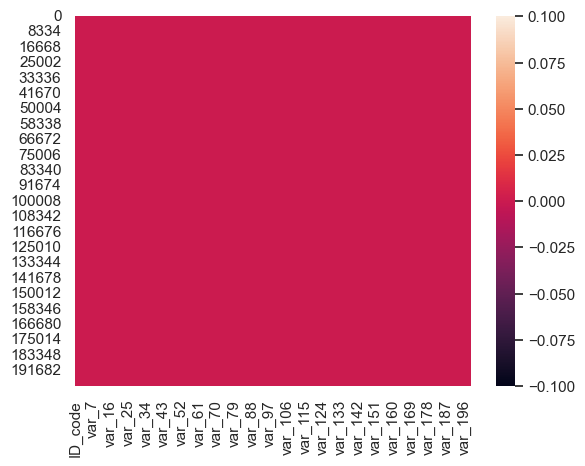

In [38]:
sns.heatmap(df.isnull())
# Graphical way of checking null values

<AxesSubplot:xlabel='target', ylabel='Density'>

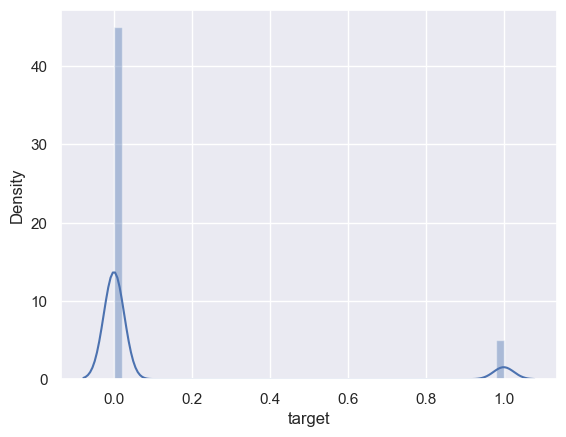

In [39]:
sns.distplot(df.target)

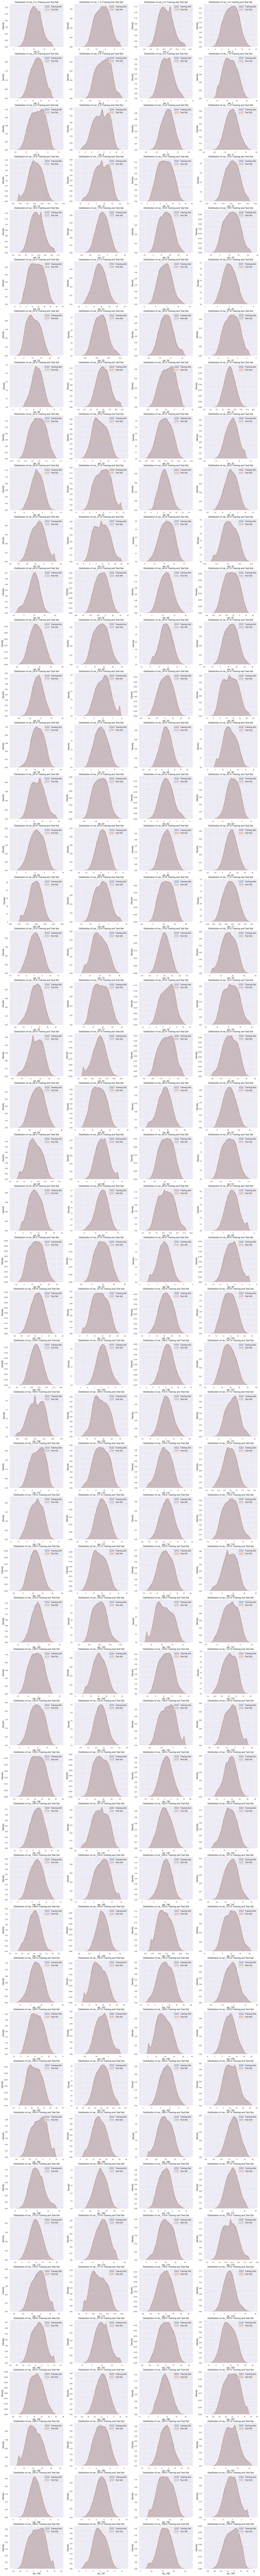

In [41]:
features = [col for col in df.columns.tolist() if col.startswith('var')]

nrows = 50
fig, axs = plt.subplots(nrows=50, ncols=4, figsize=(24, nrows * 5))

for i, feature in enumerate(features, 1):
    plt.subplot(50, 4, i)
    sns.kdeplot(df[feature], bw='silverman', label='Training Set', shade=True)
    sns.kdeplot(tdf[feature], bw='silverman', label='Test Set', shade=True)
    
    plt.tick_params(axis='x', which='major', labelsize=8)
    plt.tick_params(axis='y', which='major', labelsize=8)
    
    plt.legend(loc='upper right')
    plt.title('Distribution of {} in Training and Test Set'.format(feature))
    
plt.show()

### Variance inflation Factor

In [42]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [44]:
# # features to consider removing
# considered_features = ['ID_code' ]


# # compute vif 
# compute_vif(considered_features).sort_values('VIF', ascending=False)


# Check VIF and fix it

<AxesSubplot:>

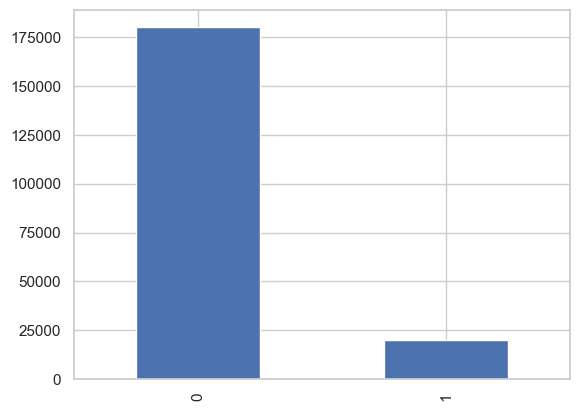

In [52]:
df['target'].value_counts().plot.bar()

In [47]:
df['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

### Let us now find the co-relation between the features

In [53]:
corr = df.corr()
abs(corr['target']).sort_values(ascending=False)

target     1.000000
var_81     0.080917
var_139    0.074080
var_12     0.069489
var_6      0.066731
             ...   
var_38     0.000970
var_17     0.000864
var_30     0.000638
var_27     0.000582
var_185    0.000053
Name: target, Length: 201, dtype: float64

In [54]:
# the target is binary and variables are continous, so correlation is not a good measure of judgement